<a href="https://colab.research.google.com/github/907Resident/caldera-gas-emissions/blob/logistic-prediction/site_differentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Site Differentation
How are the sites similar and/or different.

## Importing necessary libraries

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Import data
The data have been processed using code developed in MATLAB previously. The data is currently stored in a OneDrive directory. Therefore to access it, one will need to use [`onedrivesdk<2`](https://github.com/OneDrive/onedrive-sdk-python/blob/master/README.md#onedrive). This library will be able to tap into the OneDrive API. After user authentication, you can get the necesary files for this exercise. 

_need to return to get `onedrivesdk` working properly_

In [ ]:
#!pip install "onedrivesdk<2"

     |████████████████████████████████| 204kB 5.6MB/s 
  Created wheel for onedrivesdk: filename=onedrivesdk-1.1.8-cp36-none-any.whl size=147150 sha256=c2e10c2ad86165a776de2a97b73297d69fc07c78def8e870ba7d87740b65229c
  Stored in directory: /root/.cache/pip/wheels/8f/0c/f0/fe6e0677e05a8bfbd6c2b8d2034db9bcdc03f365545a990fff
Successfully built onedrivesdk


In [ ]:
'''
# Import packages from `ondrivesdk`
import onedrivesdk
from onedrivesdk.helpers import GetAuthCodeServer
from onedrivesdk.helpers.resource_discovery import ResourceDiscoveryRequest

redirect_uri = 'http://localhost:8080/' 
client_secret = 'txwlRACN800:~abtZDV08@=' 
client_id='9603342a-0630-4e1c-9fb1-fe97746511ae' 
api_base_url= 'https://graph.microsoft.com/v1.0/' 
scopes=['wl.signin', 'wl.offline_access', 'onedrive.readwrite'] 
http_provider = onedrivesdk.HttpProvider() 
auth_provider = onedrivesdk.AuthProvider(http_provider=http_provider, 
                                         client_id=client_id, 
                                         scopes=scopes) 
client = onedrivesdk.OneDriveClient(api_base_url, auth_provider, 
                                    http_provider) 
auth_url = client.auth_provider.get_auth_url(redirect_uri) 
print(auth_url)
code = "https://login.live.com/oauth20_authorize.srf?client_id=64bdfc12-0546-4082-beb4-8504880da74e&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=wl.signin+wl.offline_access+onedrive.readwrite"
client.auth_provider.authenticate(code, redirect_uri, client_secret)
'''

https://login.live.com/oauth20_authorize.srf?client_id=9603342a-0630-4e1c-9fb1-fe97746511ae&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=wl.signin+wl.offline_access+onedrive.readwrite


Exception: ignored

Using manual file upload until issue #1 is resolved

In [10]:
# Manual File Upload from local drive
from google.colab import files
uploaded2018 = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData.xlsx


In [11]:
# Import file into workspace
import io
df_2018_YC = pd.read_excel(io.BytesIO(uploaded2018['YNP_SummaryData.xlsx']), 
                           sheet_name="2018",
                           header=0)
# Delete first row that contains secondary data information
df_2018_YC.drop([0], inplace=True)

# Reset index
df_2018_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.7447,-110.713,2018-06-20 00:00:00,2018-06-20 11:48:30,2018-06-20 12:08:00,19.5,0.0001738,0.00152353,7.14093,-142.064,156.346,214.948,1.88424,-5.56615,-5.87406,-5.25824,-5.87406,-5.25824,1.11546e+11,NaN,NaN,1.31763,714.47
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:22:30,2018-06-20 12:42:00,19.5,-0.000784411,-0.00687615,-116.363,-386.473,153.747,437.633,3.83629,-19.2932,-19.4558,-19.1307,-19.4558,-19.1307,-29.0515,NaN,NaN,1.31647,778.056
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:56:30,2018-06-20 13:15:59,19.4833,-0.00236666,-0.0207461,36.94,-59.3935,133.273,215.394,1.88815,-23.4323,-23.7177,-23.1469,-23.7177,-23.1469,450282228398209761280,NaN,NaN,1.31442,737.47
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 13:32:33,2018-06-20 13:51:57,19.4,-0.00125964,-0.011042,31.0104,-84.1555,146.176,347.507,3.04624,-22.9485,-23.1399,-22.757,-23.1399,-22.757,503872814901302919168,NaN,NaN,1.31679,688.697
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 14:07:30,2018-06-20 14:27:00,19.5,-0.000472218,-0.00413946,317.581,-88.6927,723.856,350.529,3.07273,-19.3013,-19.5028,-19.0999,-19.5028,-19.0999,251936407216017440768,NaN,NaN,1.31185,708.358


In [12]:
# Import data from 2019 into Workspace
uploaded2019 = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData (1).xlsx


In [13]:
# Import file into workspace
df_2019_YC = pd.read_excel(io.BytesIO(uploaded2019['YNP_SummaryData.xlsx']), 
                           sheet_name="2019",
                           header=0)
# Delete first row that contains secondary data information
df_2019_YC.drop([0], inplace=True)

# Reset index
df_2019_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.7095,-110.554,2019-06-06 00:00:00,2019-06-06 11:15:48,2019-06-06 11:33:27,17.65,-0.0142029,-0.124503,-60.1871,-94.4202,-25.954,61.6027,0.540009,-0.994721,-0.994721,4.3392,NaN,NaN,NaN,NaN,NaN,10.8,NaN
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.7097,-110.554,2019-06-06 00:00:00,2019-06-06 11:49:57,2019-06-06 12:04:49,14.8667,0.245512,2.15215,-11.7023,-14.3093,-9.09528,1998.61,17.5198,-4.19908,-4.19908,-4.04135,NaN,NaN,NaN,NaN,NaN,19,NaN
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.7098,-110.554,2019-06-06 00:00:00,2019-06-06 12:26:56,2019-06-06 12:35:29,8.55,1.92642,16.887,-30.8819,-31.8585,-29.9052,3759.53,32.956,-6.3691,-6.3691,-6.1339,NaN,NaN,NaN,NaN,NaN,20.7,NaN
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.7112,-110.554,2019-06-06 00:00:00,2019-06-06 13:59:30,2019-06-06 14:01:43,2.21667,9.77365,85.6758,-26.7443,-28.5211,-24.9675,15562.5,136.421,-9.25684,-9.25684,-3.47258,NaN,NaN,NaN,NaN,NaN,43.3,NaN
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.7113,-110.554,2019-06-06 00:00:00,2019-06-06 14:27:20,2019-06-06 14:33:03,5.71667,4.06264,35.6131,-30.2581,-30.9619,-29.5543,5666.13,49.6693,4.18146,4.18146,7.97036,NaN,NaN,NaN,NaN,NaN,46.5,NaN


## Preprocessing and cleaning
For the initial deployment of this exercise, we will only examine data collected at Gas Vents (GVNT). Therefore, several cleaning steps are requireed to ensure correct data types, addressing missing data, and other cleaning activities.

In [14]:
# Assess the data types for the dataframe
df_2018_YC.dtypes

Site_Name                                         object
Group                                             object
Location                                          object
Soil_Classification                               object
Latitude                                          object
Longitude                                         object
Date_of_Measurement                               object
Start_Time_of_Chamber_Enclosure                   object
End_Time_of_Chamber_Enclosure                     object
Duration_of_Chamber_Enclosure                     object
CH4_Flux                                          object
Long_Term CH4_Flux                                object
d13CH4_source                                     object
LowerBound_d13CH4_source                          object
UpperBound_d13CH4_source                          object
CO2_Flux                                          object
Long_Term_CO2_Flux                                object
d13CO2_source                  

From visual inspection of the data types, it appears that all columns have been set to `object`. Therefore, it will require a dictionary where, I have mannually set up.

In [15]:
# Set dictionary for correct data types
data_types = {"Group":"category", 
              "Location":"object",
              "Soil_Classification":"category", 
              "Latitude":"float64","Longitude":"float64", 
              "Date_of_Measurement":"datetime64",
              "Start_Time_of_Chamber_Enclosure":"datetime64", 
              "End_Time_of_Chamber_Enclosure":"datetime64",
              "Duration_of_Chamber_Enclosure":"float64",
              "CH4_Flux":"float64",
              "d13CH4_source":"float64", 
              "LowerBound_d13CH4_source":"float64",
              "UpperBound_d13CH4_source":"float64",
              "CO2_Flux":"float64",
              "LowerBound_d13CO2_source":"float64",
              "UpperBound_d13CO2_source":"float64"}

# Set data types accordingly
df_2018_YC = df_2018_YC.astype(data_types)
df_2019_YC = df_2019_YC.astype(data_types)

# Confirm correct data types
df_2018_YC.dtypes

Site_Name                                                 object
Group                                                   category
Location                                                  object
Soil_Classification                                     category
Latitude                                                 float64
Longitude                                                float64
Date_of_Measurement                               datetime64[ns]
Start_Time_of_Chamber_Enclosure                   datetime64[ns]
End_Time_of_Chamber_Enclosure                     datetime64[ns]
Duration_of_Chamber_Enclosure                            float64
CH4_Flux                                                 float64
Long_Term CH4_Flux                                        object
d13CH4_source                                            float64
LowerBound_d13CH4_source                                 float64
UpperBound_d13CH4_source                                 float64
CO2_Flux                 

In [16]:
# Drop unnecessary columns
df_2018_YC.drop(df_2018_YC.columns[20:27],
                axis=1, inplace=True)
df_2019_YC.drop(df_2019_YC.columns[20:27],
                axis=1, inplace=True)
# Show columns to confirm drop
df_2018_YC.columns

Index(['Site_Name', 'Group', 'Location', 'Soil_Classification', 'Latitude',
       'Longitude', 'Date_of_Measurement', 'Start_Time_of_Chamber_Enclosure',
       'End_Time_of_Chamber_Enclosure', 'Duration_of_Chamber_Enclosure',
       'CH4_Flux', 'Long_Term CH4_Flux', 'd13CH4_source',
       'LowerBound_d13CH4_source', 'UpperBound_d13CH4_source', 'CO2_Flux',
       'Long_Term_CO2_Flux', 'd13CO2_source', 'LowerBound_d13CO2_source',
       'UpperBound_d13CO2_source'],
      dtype='object')

In [17]:
# Preview 2018 DataFrame
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.744714,-110.712883,2018-06-20,2018-06-20 11:48:30,2018-06-20 12:08:00,19.500000,0.000174,0.00152353,7.140927,-142.064286,156.346140,214.948480,1.88424,-5.56615,-5.874057,-5.258235
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.744758,-110.712736,2018-06-20,2018-06-20 12:22:30,2018-06-20 12:42:00,19.500000,-0.000784,-0.00687615,-116.362966,-386.473305,153.747374,437.632807,3.83629,-19.2932,-19.455798,-19.130683
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.744814,-110.712583,2018-06-20,2018-06-20 12:56:30,2018-06-20 13:15:59,19.483333,-0.002367,-0.0207461,36.940010,-59.393456,133.273475,215.394469,1.88815,-23.4323,-23.717714,-23.146891
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.744978,-110.712708,2018-06-20,2018-06-20 13:32:33,2018-06-20 13:51:57,19.400000,-0.001260,-0.011042,31.010437,-84.155527,146.176401,347.506806,3.04624,-22.9485,-23.139932,-22.756976
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745047,-110.712861,2018-06-20,2018-06-20 14:07:30,2018-06-20 14:27:00,19.500000,-0.000472,-0.00413946,317.581459,-88.692665,723.855582,350.528532,3.07273,-19.3013,-19.502787,-19.099911


In [18]:
# Preview 2019 DataFrame
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.709504,-110.553566,2019-06-06,2019-06-06 11:15:48,2019-06-06 11:33:27,17.650000,-0.014203,-0.124503,-60.187106,-94.420223,-25.953990,61.602677,0.540009,-0.994721,-0.994721,4.339204
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.709732,-110.553658,2019-06-06,2019-06-06 11:49:57,2019-06-06 12:04:49,14.866667,0.245512,2.15215,-11.702293,-14.309306,-9.095280,1998.611542,17.5198,-4.19908,-4.199076,-4.041347
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.709816,-110.553599,2019-06-06,2019-06-06 12:26:56,2019-06-06 12:35:29,8.550000,1.926425,16.887,-30.881871,-31.858541,-29.905202,3759.525151,32.956,-6.3691,-6.369096,-6.133900
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.711171,-110.553609,2019-06-06,2019-06-06 13:59:30,2019-06-06 14:01:43,2.216667,9.773651,85.6758,-26.744295,-28.521085,-24.967505,15562.486763,136.421,-9.25684,-9.256836,-3.472577
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.711273,-110.553768,2019-06-06,2019-06-06 14:27:20,2019-06-06 14:33:03,5.716667,4.062640,35.6131,-30.258069,-30.961868,-29.554269,5666.133748,49.6693,4.18146,4.181460,7.970357


In [19]:
# Concatenate 2018 & 2019 dataframes
df_YC_all = pd.concat([df_2018_YC, df_2019_YC], ignore_index=True)

# Preview dataframe dimensions
df_YC_all.shape

(154, 21)

In [20]:
# Convert Fluxes to mass m-2 per day
df_YC_all["CH4_Flux"] = df_YC_all.CH4_Flux * 24
df_YC_all["CO2_Flux"] = df_YC_all.CO2_Flux * 24

## Visualize flux and isotope compositions
To begin the exploratory data analysis process, we will visualize the two variables of interest, fluxes and carbon isotope (δ<sup>13</sup>C) compositions. The analysis will begin with site-by-site analysis and then examine geochemical groups.

In [21]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
# Point directory to correct place
%cd /content/gdrive/My Drive/Colab Notebooks/caldera-gases

/content/gdrive/My Drive/Colab Notebooks/caldera-gases


### Descriptive Statistics

In [23]:
# Descriptive statistics for numeric data
df_YC_descrip = df_YC_all.describe(include=[np.number])
df_YC_descrip

,Latitude,Longitude,Duration_of_Chamber_Enclosure,CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,LowerBound_d13CO2_source,UpperBound_d13CO2_source
count,146.000000,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,44.638405,-110.623380,13.666327,19.241308,-34.102750,-89.900414,21.922635,51126.039486,-9.605762,-5.793381
std,0.159328,0.192855,6.760053,48.397572,49.404711,87.000758,93.665903,79853.558222,21.651186,22.424012
min,44.415900,-110.846600,1.850000,-0.843960,-178.100408,-492.474963,-70.815084,-598.603106,-173.795614,-167.145707
25%,44.470500,-110.806275,7.900000,-0.170222,-57.562841,-113.723317,-22.505913,1113.243711,-14.538849,-10.342205
50%,44.647300,-110.703405,14.866667,0.055147,-28.278966,-73.433362,-6.683255,9911.238192,-5.563228,-3.548296
75%,44.723408,-110.552514,19.750000,17.819436,-16.712272,-25.768953,42.239005,57516.476436,-1.916186,0.205694
max,44.972700,-110.219897,30.300000,337.107570,317.581459,22.629418,723.855582,422852.024070,50.591769,73.909350


In [25]:
# Descriptive Stats by Group
df_YC_descrip_grp = df_YC_all.groupby(by=["Group", "Soil_Classification"])[["CH4_Flux", "CO2_Flux"]].describe()
df_YC_descrip_grp

CH4_Flux  ...       CO2_Flux
                                                     count  ...            max
Group                         Soil_Classification           ...               
Eastern Yellowstone           Acid-Sulphate           15.0  ...  287760.462839
                              Unclassified             8.0  ...   27368.656860
Gas Vents (Solfatara Springs) Acid-Sulphate           23.0  ...  422852.024070
Lower GB                      Neutral-Chloride         8.0  ...    4899.157829
Mammoth HS                    Travertine              10.0  ...  233429.837175
Mud Volcano                   Acid-Sulphate           10.0  ...  188859.551626
Norris GB                     Neutral-Chloride        21.0  ...   54755.474303
North of Norris GB            Acid-Sulphate            8.0  ...  189483.629032
Terrace Springs               Travertine               6.0  ...    2074.443951
Upper GB                      Neutral-Chloride        27.0  ...   18430.704840
West Thumb GB                 Neutral-Chloride        11.0  ...    8383.322477

[11 rows x 16 columns]

### Flux and δ<sup>13</sup>C Summary

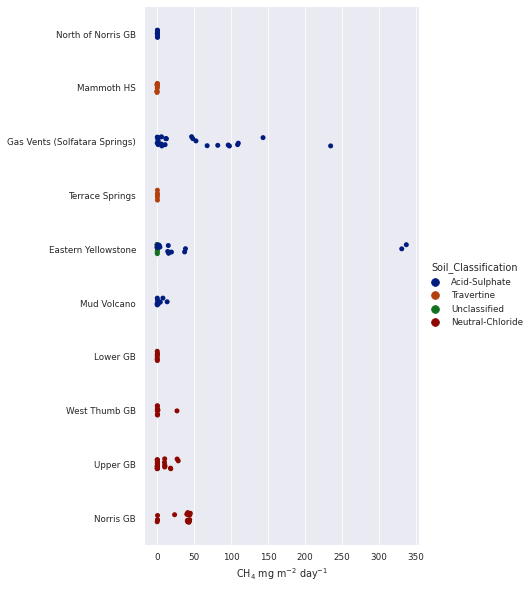

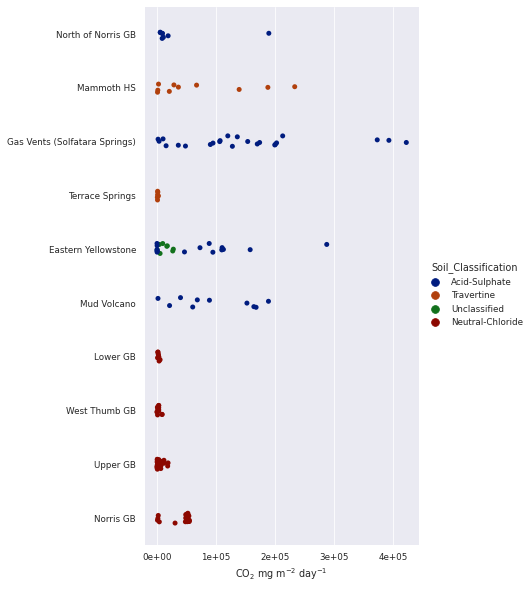

In [26]:
# Import axis formatting package
import matplotlib.ticker as ticker

# Set theme (e.g., visual style, color pallette, etc.)
sns.set_theme(context="paper", style="darkgrid", palette="dark")

# Boxplot fluxes by group (i.e. site)
## CH4
p_CH4_flx = sns.catplot(x="CH4_Flux", y="Group", data=df_YC_all,
            kind="strip",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CH4_flx.set_axis_labels("CH$_4$ mg m$^{-2}$ day$^{-1}$", "")
#p_CH4_flx.set(xscale="log")
# Save plot to Google Drive Directory
plt.savefig("figures/CH4_flx_swarm.png", dpi=300)

## CO2
p_CO2_flx = sns.catplot(x="CO2_Flux", y="Group", data=df_YC_all,
            kind="strip",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CO2_flx.set_axis_labels("CO$_2$ mg m$^{-2}$ day$^{-1}$", "")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))
plt.savefig("figures/CO2_flx_swarm.png", dpi=300)


Flux Figure: Strip plots of fluxes collected across Yellowstone and sorted by groups as they are presented in Bergfeld et al. (2011) and Chiodini et al. (2012). The data are sorted by their geothermal classification. 

The strip plots of CH4 and CO2 fluxes (Figure ##) highlight the extent to which fluxes can vary at each site. There was a wide range of CH4 flux observations (19.24 ± 48.40 mg m<sup>-2</sup> day<sup>-1</sup>) with the maximum value (337 mg m<sup>-2</sup> day<sup>-1</sup>) occuring in the eastern portion of the park (coordinates?). These exceptionally high fluxes occurred in regions supported by previous reports (Werner). In particular, acid-sulphate patches along the East Entrance Road oustide of the caldera boundary, CH4 fluxes were very high (54.17 ± 114.31 mg m<sup>-2</sup> day<sup>-1</sup> ). Similary within Gas Vents (also known as Solfatara Springs), fluxes of CH4 varied greately but were also great in magnitude as well (49.45 ± 69.49 <sup>-2</sup> day<sup>-1</sup>). Apart from the high fluxes that occured in the eastern portion of YNP, most CH4 fluxes were relatively low (≤ 6 mg <sup>-2</sup> day<sup>-1</sup>) across YNP.

These CO2 flux data align with previous work conducted by Wener and Brantley (2003), where the neutral-chloride sections were low in CO2 fluxes and the acid-sulphate regions distinguished themselves with higher fluxes (Figure ##). Results from this study at Mud Volacano (95.20 ± 67.88 g <sup>-2</sup> day<sup>-1</sup>) are within the same order of magnitude presented in Werner and Brantley (2003). However, measurements in the acid-sulphate region at Gas Vents (147.71 ± 119.30 g <sup>-2</sup> day<sup>-1</sup>) eclipse the Mud Volcano.

Now, let's visualize the carbon isotopes. We will do this within the landscape of associated fluxes through a scatter plot.

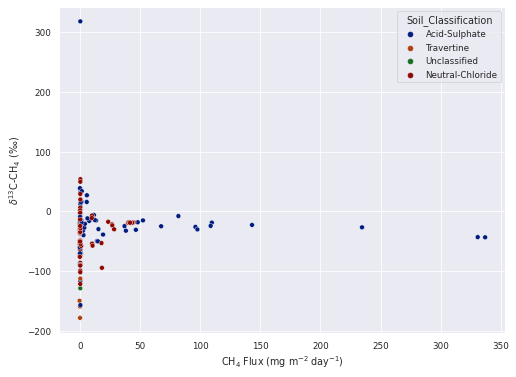

<Figure size 432x288 with 0 Axes>

In [27]:
# Scatter plot for d13C vs Fluxes
## CH4
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_YC_all,
                                 hue="Soil_Classification")
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.show()
plt.savefig("figures/CH4_d13_flx_all.png", dpi=300)

In [28]:
# Create trimmed dataframe (use isotopes to trim)
df_YC_iso_trim = df_YC_all[(df_YC_all["d13CH4_source"] <= 0) &
                            (df_YC_all["d13CH4_source"] >= -100) &
                            (df_YC_all["d13CO2_source"] <= 0) &
                            (df_YC_all["d13CO2_source"] >= -100)]
# Quantify the error for the isotopes                            
df_YC_iso_trim["d13CH4_err"] = df_YC_iso_trim.UpperBound_d13CH4_source - df_YC_iso_trim.LowerBound_d13CH4_source
df_YC_iso_trim["d13CO2_err"] = df_YC_iso_trim.UpperBound_d13CO2_source - df_YC_iso_trim.LowerBound_d13CO2_source                               
df_YC_iso_trim.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Long_Term_CH4_Flux,d13CH4_err,d13CO2_err
5,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.3,Acid-Sulphate,44.745106,-110.713044,2018-06-20,2018-06-20 14:41:31,2018-06-20 15:01:00,19.483333,0.100536,0.0367207,-37.642047,-109.340072,34.055978,18556.247163,6.77767,-8.47776,-8.603758,-8.351763,NaN,143.396050,0.251995
7,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_3.2,Acid-Sulphate,44.750619,-110.715500,2018-06-20,2018-06-20 16:35:31,2018-06-20 16:55:00,19.483333,0.025738,0.00940078,-35.929670,-139.146822,67.287483,8967.995645,3.27556,-10.2706,-10.453702,-10.087475,NaN,206.434305,0.366227
11,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.1,Travertine,44.972033,-110.706000,2018-06-21,2018-06-21 12:17:08,2018-06-21 12:30:03,12.916667,-0.523629,-0.191256,-73.383265,-100.415714,-46.350817,66807.423288,24.4014,-2.39055,-2.555541,-2.225555,NaN,54.064897,0.329986
12,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.2,Travertine,44.971967,-110.705739,2018-06-21,2018-06-21 12:44:35,2018-06-21 12:49:33,4.966667,-0.444378,-0.162309,-60.396107,-74.404621,-46.387593,35962.559266,13.1353,-4.63314,-4.719340,-4.546946,NaN,28.017028,0.172394
13,Mammoth Hot Springs,Mammoth HS,MMTH_21Jun2018_2.3,Travertine,44.971647,-110.705356,2018-06-21,2018-06-21 13:21:47,2018-06-21 13:43:14,21.450000,-0.450886,-0.164686,-57.830239,-74.681387,-40.979092,28379.514371,10.3656,-3.62192,-3.695535,-3.548296,NaN,33.702295,0.147239


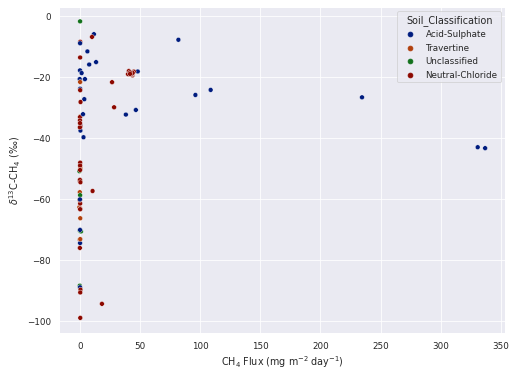

<Figure size 432x288 with 0 Axes>

In [29]:
## CH4
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_YC_iso_trim,
                                 hue="Soil_Classification")
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.show()
plt.savefig("figures/CH4_d13_flx_trim.png", dpi=300)

In [30]:
# Create an errorbar function for plotting
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="scatter", ax=ax, **kwargs)

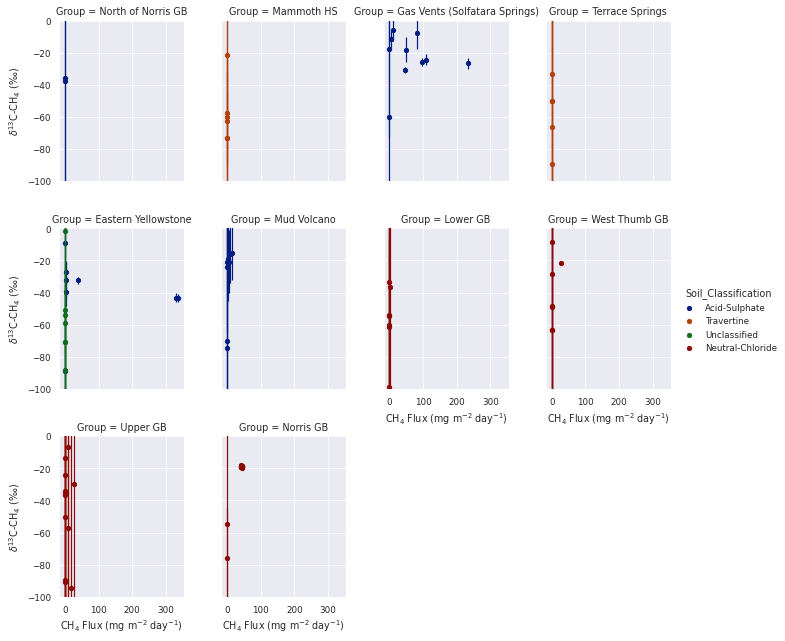

In [31]:
## CH4
fg = sns.FacetGrid(df_YC_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(errplot, x="CH4_Flux", y="d13CH4_source", yerr="d13CH4_err")
fg.set(ylim=(-100,0),
       xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CH4_v_CH4_Flux")

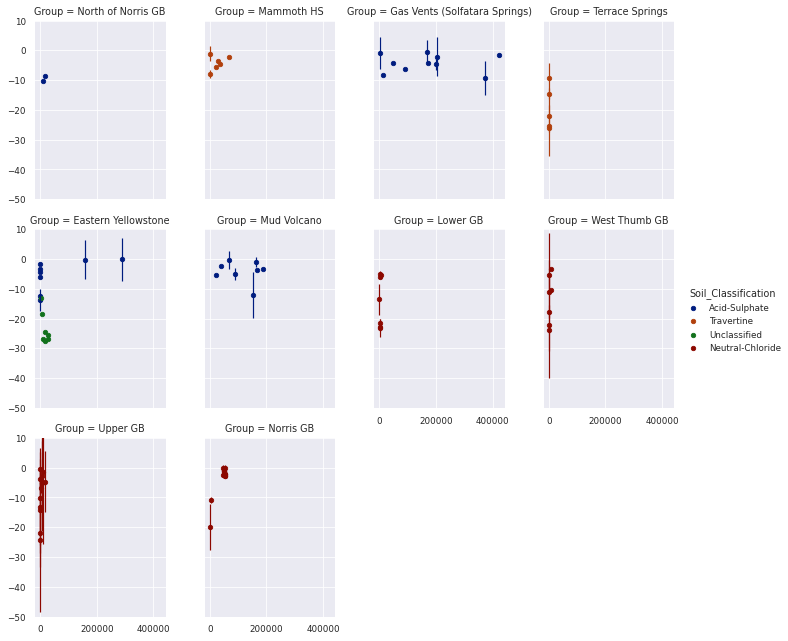

In [32]:
## CO2
fg = sns.FacetGrid(df_YC_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(errplot, x="CO2_Flux", y="d13CO2_source", yerr="d13CO2_err")
fg.set(ylim=(-50,10))
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CO2_v_CO2_Flux")

### Hypothesis Tests Across Groups

Having visualized the fluxes and δ<sup>13</sup>C compositions, it is time to quantify the differences between groups using frequentist methods. An analysis of variance will allow us to compare the means of the fluxes in the groups (site and thermal geochemistry). 

Using the information gleaned from quantifying the mean and standard deviation of the fluxes it is possible that one or both gases are displaying non-normal behavior. To test this, we employ Kolmogorov-Smirnov (KS) test for normality.

In [33]:
# Import KS test from statsmodels
from statsmodels.stats.diagnostic import kstest_normal

## CH4
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_YC_iso_trim.CH4_Flux)
# Print result
print("The p-value for the CH4 fluxes of the KS test was {}".format(pvalue))

## CO2
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_YC_iso_trim.CO2_Flux)
# Print result
print("The p-value for the CO2 fluxes of the KS test was {}".format(pvalue))

The p-value for the CH4 fluxes of the KS test was 3.062479973175797e-28
The p-value for the CO2 fluxes of the KS test was 6.834918344723726e-19


The KS test for the CH<sub>4</sub> and CO<sub>2</sub> fluxes shows that these meterics **do not** represent normally distributed data. Therfore, to analyze the significant differences between groups, a non-parametric model will need to be used. In this case, a [Kruskal-Wallis](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) (KW) test will be appropriate. The KW test will analyze the different groups (sites) as they have been presented above to see if at least one group is significantly different than the others. If so, post-hoc tests will be conducted to see which group(s) are significantly different. 

In [34]:
# Conduct the KW test
import scipy.stats as spstat

## CH4
# Split the dataframe up by the groups (i.e., site)
gb = df_YC_iso_trim.groupby('Group')    
gb = [gb.get_group(x) for x in gb.groups]

KW, pvalue = spstat.kruskal(gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux, 
                            gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                            gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                            gb[9].CH4_Flux)
print("The pvalue for the Kruskal-Wallis test for CH4 fluxes is: {}".format(pvalue))

## CO2
# Split the dataframe up by the groups (i.e., site)
bg = df_YC_iso_trim.groupby('Group')    
bg = [bg.get_group(x) for x in bg.groups]

KW, pvalue = spstat.kruskal(bg[0].CO2_Flux, bg[1].CO2_Flux, bg[2].CO2_Flux, 
                            bg[3].CO2_Flux, bg[4].CO2_Flux, bg[5].CO2_Flux,
                            bg[6].CO2_Flux, bg[7].CO2_Flux, bg[8].CO2_Flux,
                            bg[9].CO2_Flux)
print("The pvalue for the Kruskal-Wallis test for CO2 fluxes is: {}".format(pvalue))

The pvalue for the Kruskal-Wallis test for CH4 fluxes is: 9.470108712434069e-05
The pvalue for the Kruskal-Wallis test for CO2 fluxes is: 2.64667139928577e-07


As anticipated, the KW test rejected the null hypothesis for CH<sub>4</sub> fluxes was rejected (p-value ≤ 0.0001), and the null for CO<sub>2</sub> was also rejected (p-value ≤ 0.0001). 

Since both of these gases have at least one significantly different group among them, the next step is to conduct post-hoc analysis. There are two reasonable methods to conduct this analsysis: 1) [Dunn's](https://www.statology.org/dunns-test/) test and 2) [Conover-Imam](https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-07677-MS) test. To leverage the [greatest statistical power](https://stackoverflow.com/questions/31434166/which-post-hoc-test-should-i-conduct-after-doing-a-kruskal-wallis) in assessing the different groups, the Conover-Imam test is the best option. 

In [35]:
# Install package for variation test
!pip install scikit-posthocs

In [40]:
# Assess the significant differences between groups
# Import the test
from scikit_posthocs import posthoc_conover as conover

## Apply the test to the datasets
pval_conover = conover([gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux,
                        gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                        gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                        gb[9].CH4_Flux],
                       p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover.columns = names
pval_conover.index = names
# Show the results
pval_conover

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.186376,1.000000,0.847995,1.000000,0.015205,1.0,1.00000,1.000000,1.000000
Mammoth HS,0.186376,1.000000,0.012557,0.000782,0.350478,1.000000,1.0,1.00000,0.234924,0.676202
Gas Vents (Solfatara Springs),1.000000,0.012557,1.000000,1.000000,1.000000,0.001259,1.0,1.00000,1.000000,1.000000
Terrace Springs,0.847995,0.000782,1.000000,1.000000,1.000000,0.000061,1.0,1.00000,1.000000,1.000000
Eastern Yellowstone,1.000000,0.350478,1.000000,1.000000,1.000000,0.061749,1.0,1.00000,1.000000,1.000000
Mud Volcano,0.015205,1.000000,0.001259,0.000061,0.061749,1.000000,1.0,0.67298,0.025626,0.155115
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
West Thumb GB,1.000000,1.000000,1.000000,1.000000,1.000000,0.672980,1.0,1.00000,1.000000,1.000000
Upper GB,1.000000,0.234924,1.000000,1.000000,1.000000,0.025626,1.0,1.00000,1.000000,1.000000
Norris GB,1.000000,0.676202,1.000000,1.000000,1.000000,0.155115,1.0,1.00000,1.000000,1.000000


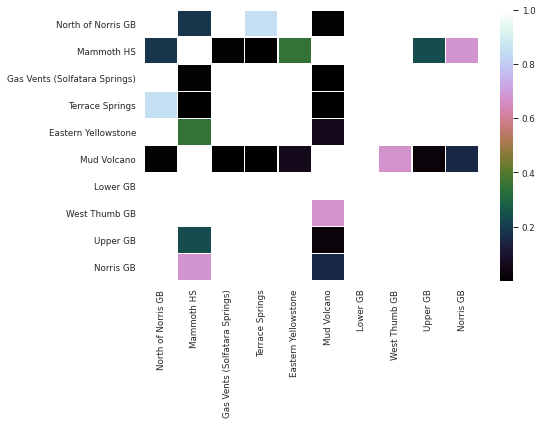

In [55]:
# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pval_conover, linewidths=0.35, cmap="cubehelix")
plt.tight_layout()
plt.savefig("figures/CH4_flx_CI_tst.png", dpi=300)

In [49]:
## CO2
## Apply the Conover-Imam test to the datasets
pval_conover = conover([bg[0].CH4_Flux, bg[1].CH4_Flux, bg[2].CH4_Flux,
                        bg[3].CH4_Flux, bg[4].CH4_Flux, bg[5].CH4_Flux,
                        bg[6].CH4_Flux, bg[7].CH4_Flux, bg[8].CH4_Flux,
                        bg[9].CH4_Flux],
                       p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover.columns = names
pval_conover.index = names
# Show the results
pval_conover

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.186376,1.000000,0.847995,1.000000,0.015205,1.0,1.00000,1.000000,1.000000
Mammoth HS,0.186376,1.000000,0.012557,0.000782,0.350478,1.000000,1.0,1.00000,0.234924,0.676202
Gas Vents (Solfatara Springs),1.000000,0.012557,1.000000,1.000000,1.000000,0.001259,1.0,1.00000,1.000000,1.000000
Terrace Springs,0.847995,0.000782,1.000000,1.000000,1.000000,0.000061,1.0,1.00000,1.000000,1.000000
Eastern Yellowstone,1.000000,0.350478,1.000000,1.000000,1.000000,0.061749,1.0,1.00000,1.000000,1.000000
Mud Volcano,0.015205,1.000000,0.001259,0.000061,0.061749,1.000000,1.0,0.67298,0.025626,0.155115
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
West Thumb GB,1.000000,1.000000,1.000000,1.000000,1.000000,0.672980,1.0,1.00000,1.000000,1.000000
Upper GB,1.000000,0.234924,1.000000,1.000000,1.000000,0.025626,1.0,1.00000,1.000000,1.000000
Norris GB,1.000000,0.676202,1.000000,1.000000,1.000000,0.155115,1.0,1.00000,1.000000,1.000000


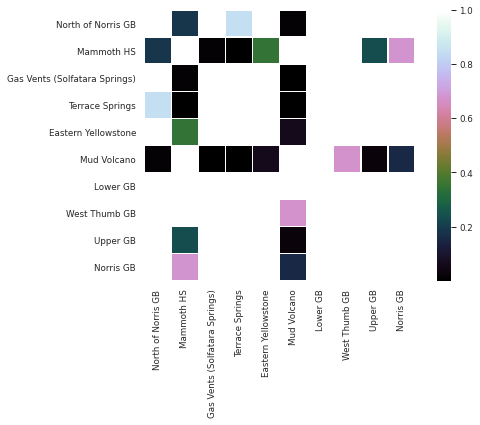

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(pval_conover, linewidths=0.35, 
            cmap="cubehelix", square=True,
            annot=False)
plt.tight_layout()
plt.savefig("figures/CO2_flx_CI_tst.png", dpi=300)